# Bank Churn Prediction - Using Neural Network Classifier

## Background and Context


Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.


# Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


# Data Dictionary

1. CustomerId: Unique ID which is assigned to each customer
2. Surname: Last name of the customer 
3. CreditScore: It defines the credit history of the customer.  
4. Geography: A customer’s location    
5. Gender: It defines the Gender of the customer   
6. Age: Age of the customer     
7. Tenure: Number of years for which the customer has been with the bank
8. NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
9. Balance: Account balance
10. HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
11. EstimatedSalary: Estimated salary 
12. isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
13. Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

# Import Necessary Libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn  import model_selection
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
import keras 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import  KerasClassifier
import random
from tensorflow.keras import backend 


# Reading Data 

In [251]:
from google.colab import drive

In [252]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [253]:
data=pd.read_csv('/gdrive/MyDrive/DataFiles/Churn.csv')

# Data Overview

In [254]:
data.shape

(10000, 14)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [256]:
data.describe(). round(2).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


In [257]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [258]:
data.duplicated().sum()

0

In [259]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

1. There are total 10,000 records with 14 columns . Exited is target variable which has two values 0 and 1 which depits , customer exited or still with Bank .
2. There are no null  or duplicate values in this data set .
3. Rownumber and Customer id column contains unique value and hence they can be dropped 
4. We have Surname , geography and gender as categorical columns and rest all columns are numberic .
5. Creditr score , age , tunure , estimated salary are normally distributed whereas Balance , Number of products is right skewed .
6. Has card and is active are left skewed which means there are less people who have cards and are active bank customers .



In [260]:
for i in data.describe(include=['object']).columns:
  print("Unique Values in ", i)
  print(data[i].value_counts(dropna=False))
  print('\n')
  print('-'* 70)

Unique Values in  Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64


----------------------------------------------------------------------
Unique Values in  Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


----------------------------------------------------------------------
Unique Values in  Gender
Male      5457
Female    4543
Name: Gender, dtype: int64


----------------------------------------------------------------------




1.   We can see there are three Geography ares namely France , Germany and Spain and most customer belong to France region .
2. There are two gender values Male and Female and customers are  Male customers are slightly higher than Female customers .
3. Surname column has lot of unique values and it is not adding any value to analysis so we will drop this column .


In [261]:
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

 Target value is  highly imbalanced . we can see  roughly 80% data is that customers will  not leave and 20 %  data  belongs to customers who will leave  with bank. So while splitting data  between train and test set we should use stratify . Also we might have to go for class weights as results might get biased by  0 class .

Rownumber and Customer id are unique values so we can drop these columns . Also Surname does not help in Customer churn identification. Hence we will drop these three columns .

In [262]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

#EDA

Let us do Univariate and Bivariate analysis

# Univariate Analysis

In [263]:
# This Function will  use to  Plot Histplot and Box Plot for all numberical columns  . We will add Lines to show mean and Median 
# so we can check skewness of data . 
# we will pass data Frame and column name as variables 
def checkDistribution(dataframe,columnName):
     plt.figure(figsize=(10,5));
     plt.subplot(1,2,1)
     plt.title("Histplot for  "+ columnName, fontsize=15)
     sns.histplot(data=dataframe,x=columnName,kde=True ,bins=15)
     plt.axvline(np.mean(dataframe[columnName]), color='green', linestyle='--') # Add mean to the histogram
     plt.text(np.mean(dataframe[columnName])+0.15,30,'Mean = '+str(round(np.mean(dataframe[columnName]),1)),rotation=90, fontsize=12)
     plt.axvline(np.median(dataframe[columnName]), color='red', linestyle='-') # Add median to the histogram
     plt.text(np.median(dataframe[columnName])+0.15,30,'Median = '+str(round(np.median(dataframe[columnName]),1)),rotation=90, fontsize=12)
     # To plot Bolxplot and showing Mean value
     plt.subplot(1,2,2)
     plt.title("Boxplot for "+ columnName, fontsize=12)
     sns.boxplot(data=dataframe,x=columnName ,showmeans=True )

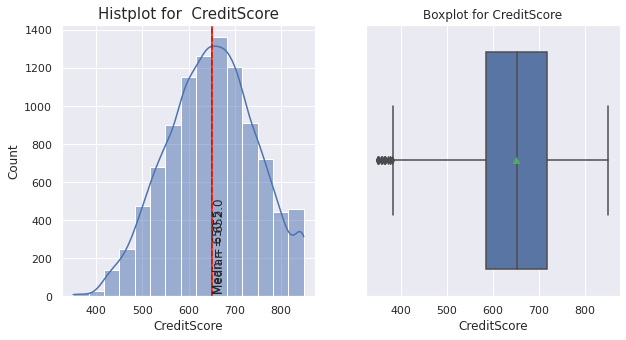

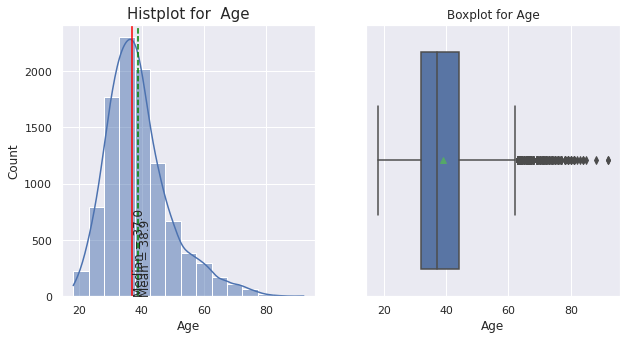

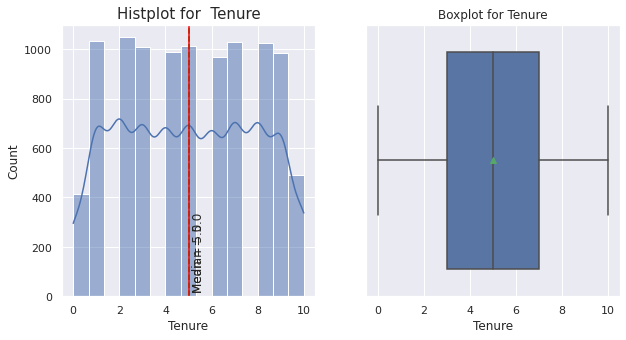

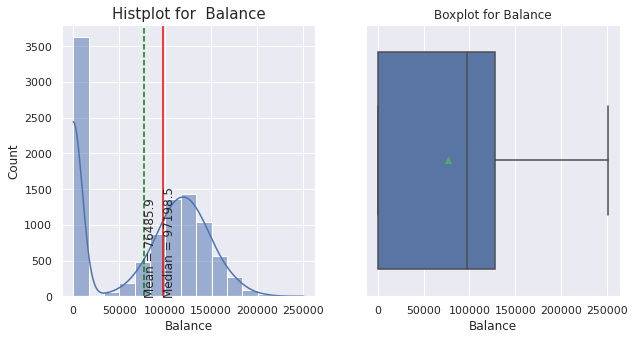

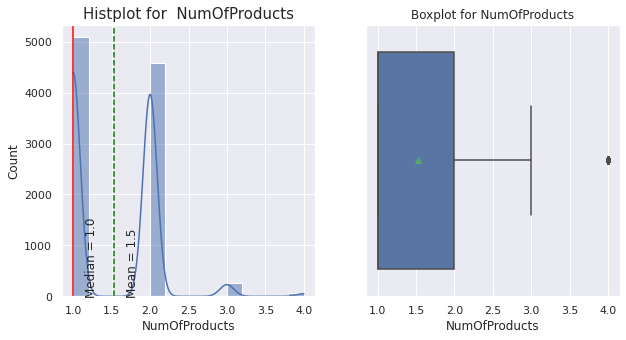

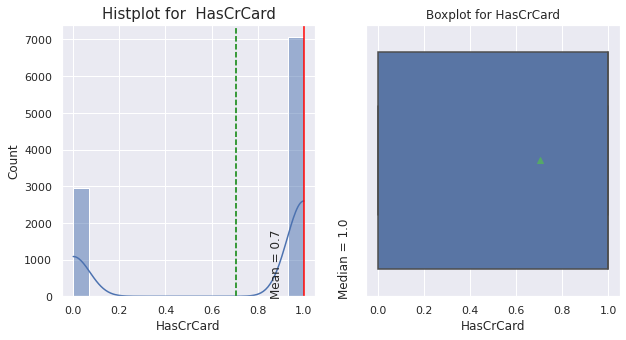

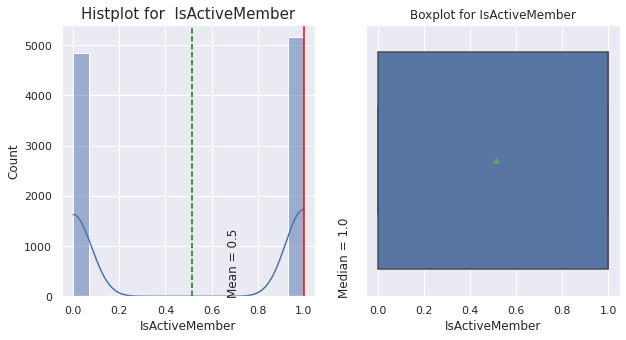

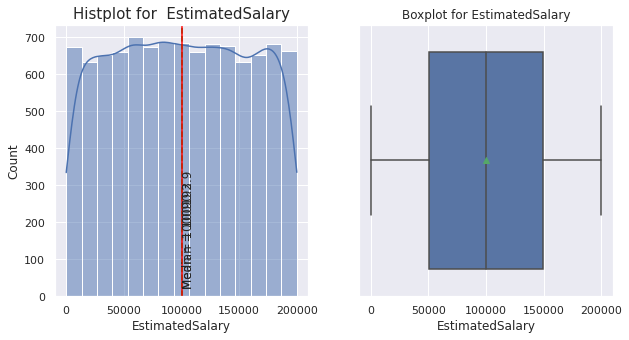

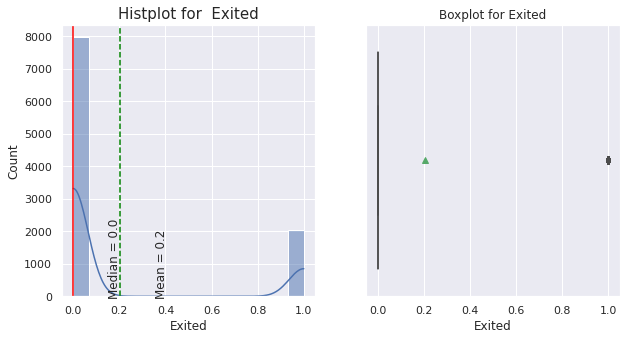

In [264]:
for i in data.describe(include=['int','float']).columns:
   checkDistribution(data,i)

##Observation

1.  For Numerical columns mostly  data is normally distributed except age , Number of Products , Balance which are skewed .
2.   Looking at these numberical columns we will have to scale and normalize them before passing it to Model.


Let us check distribution for categorical columns

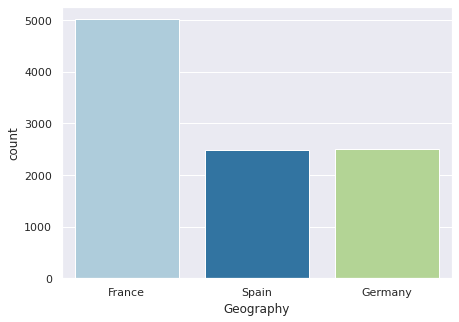

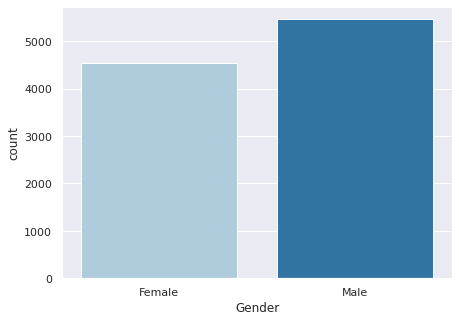

In [265]:
for i in data.describe(include=['object']).columns:
 plt.figure(figsize=(7,5))
 sns.countplot(data=data,x=i,palette="Paired")
 plt.show()


# Bivariate Analysis

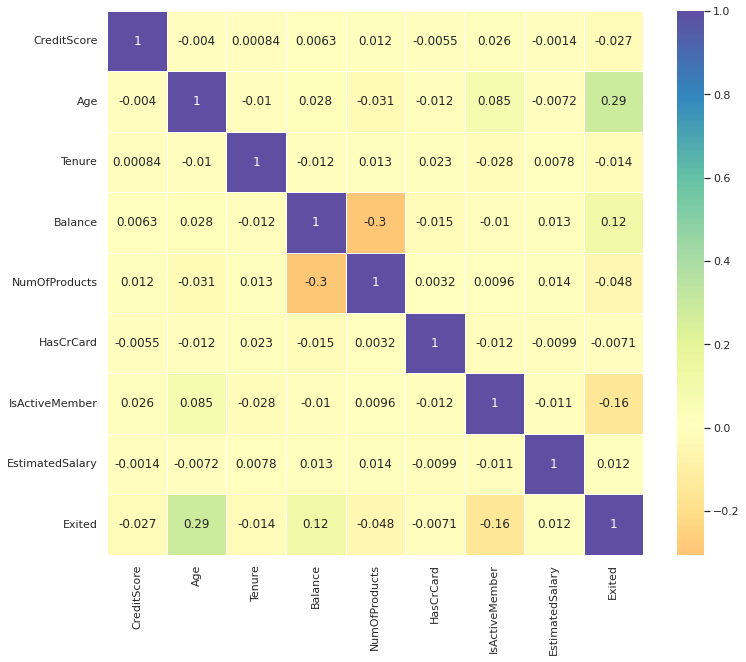

In [266]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="Spectral")
plt.show()

1. There is somewhat positive co -relation between Age and Exited . But apart from this  none of the columns are higly co-related .
2. Mostly when two or more columns/features are highly co-related we drop one or do feature engineering but in this data set none of the columns are highly co-related so we will use all these as input columns for our model .

Let us See distribution of Target variable with respect to Gender and Geography,tenure and Number of Proudcts 

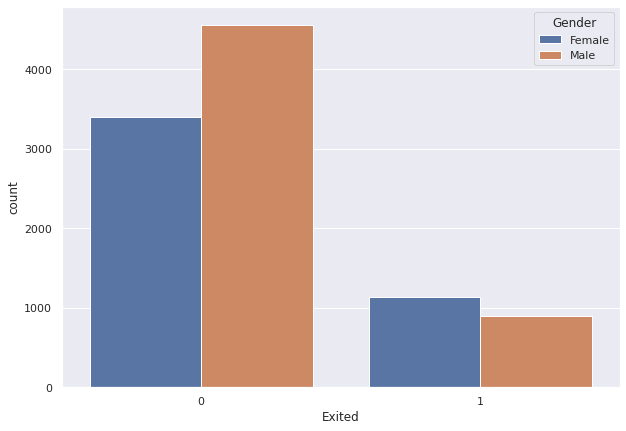

In [267]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x="Exited" , data=data,hue='Gender',hue_order=None);

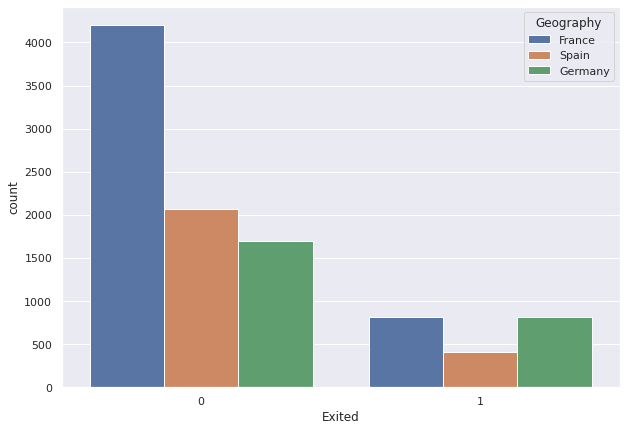

In [268]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x="Exited" , data=data,hue='Geography',hue_order=None);

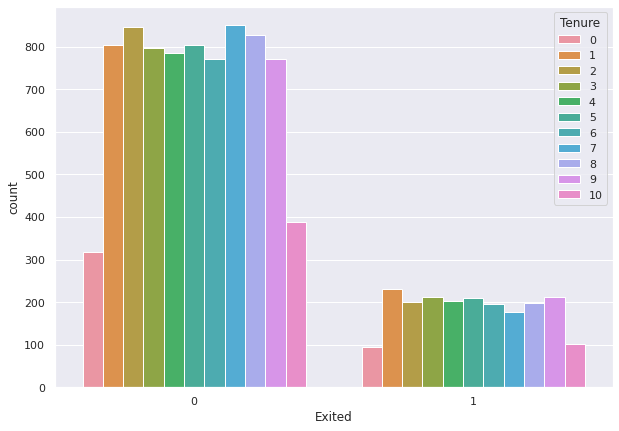

In [269]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x="Exited" , data=data,hue='Tenure',hue_order=None);

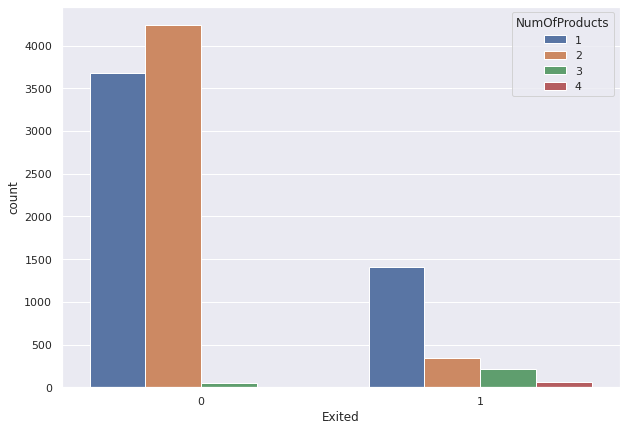

In [270]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x="Exited" , data=data,hue='NumOfProducts',hue_order=None);

1. Looiking at data we can see that as compared to male there are slightly higher female customers are existing Bank .
2. Surprising people Having 4 prodcuts are leaving Bank are compared to Customers with less Products .
3. More Customers from France and Germany are leaving Bank as compared to Customers from Spain.

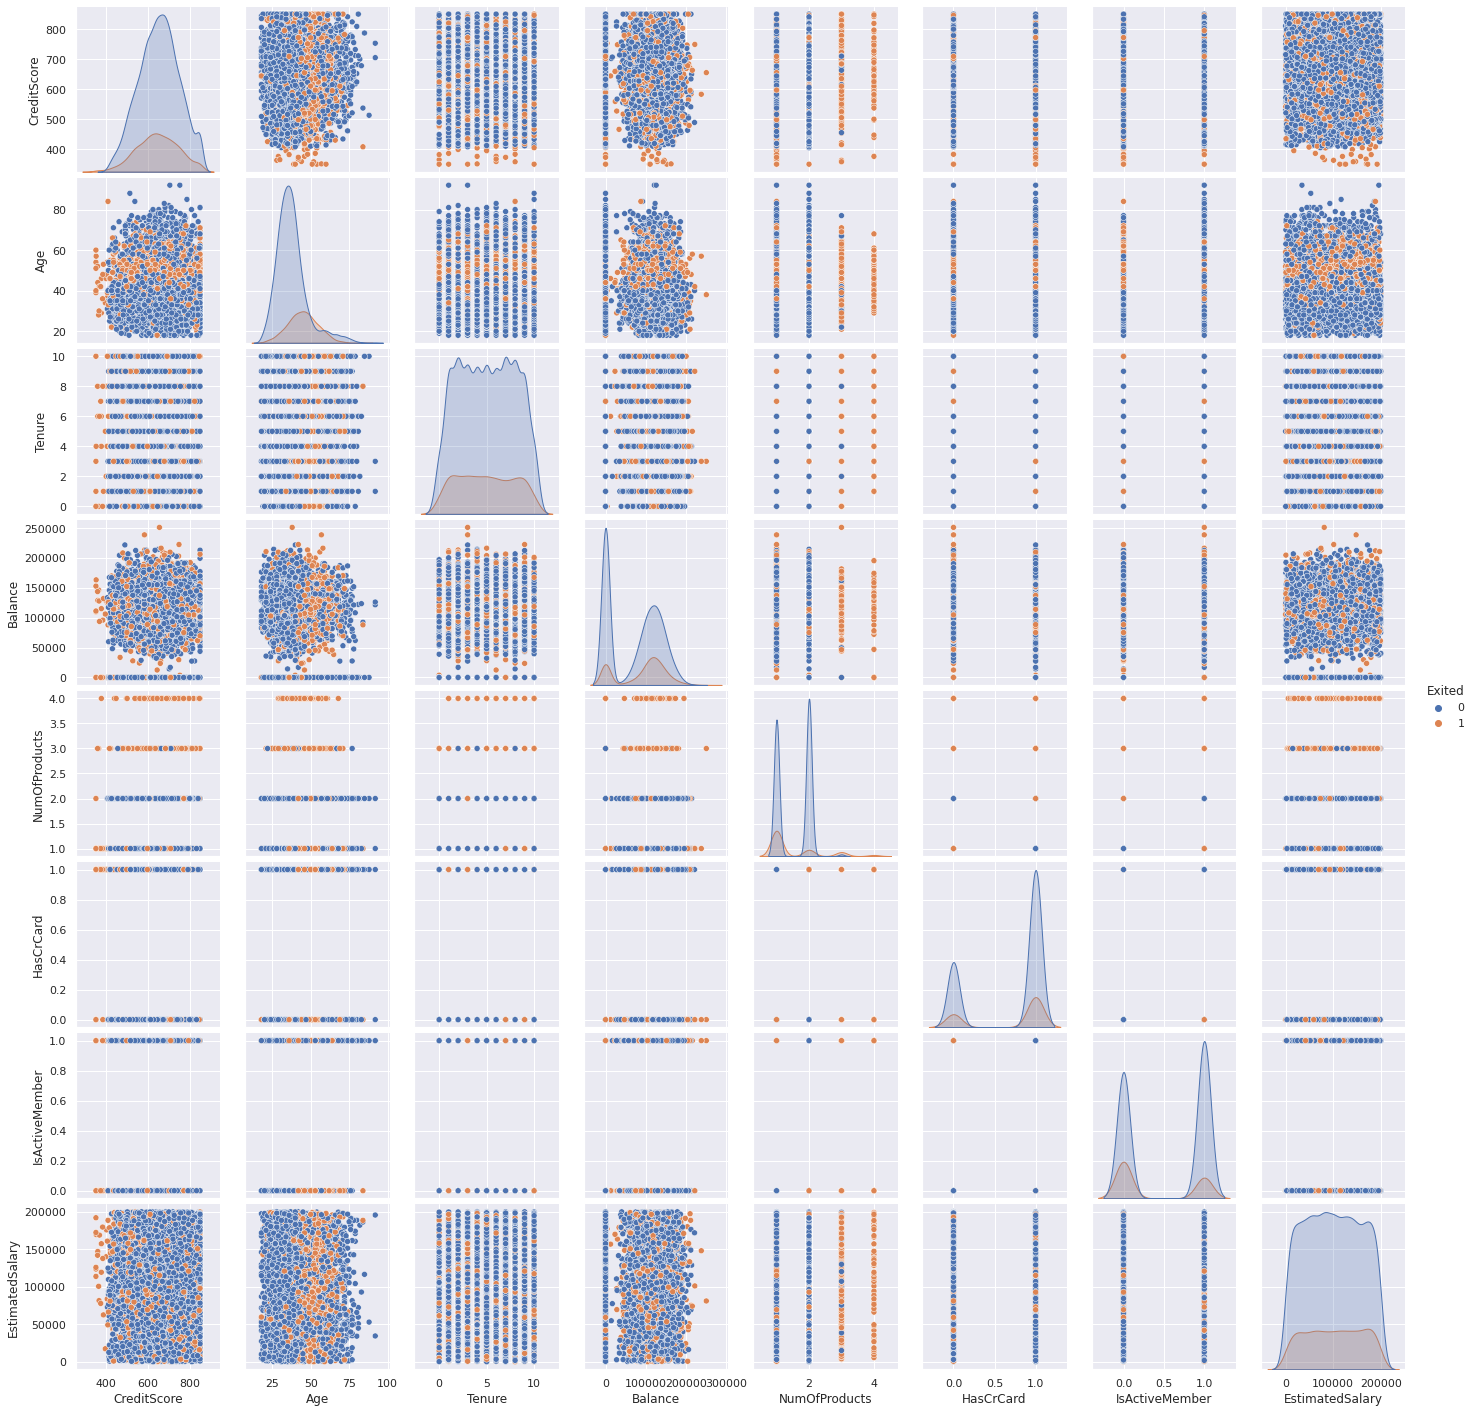

In [271]:
sns.pairplot(data=data,hue="Exited")
plt.show()

looking at pair plot above none of the column has any demarcating values which helps us in distigwishing  whether Customer will exit or not so bascially  there is not a single feature which will influcene the result  so as of now all features are contributing to outcome .

# Data Preprocessing
  Let us check if we have outliers in numberical columns and how is data distributed .Based on that we will have to treat outliers and also normalize numeric values .

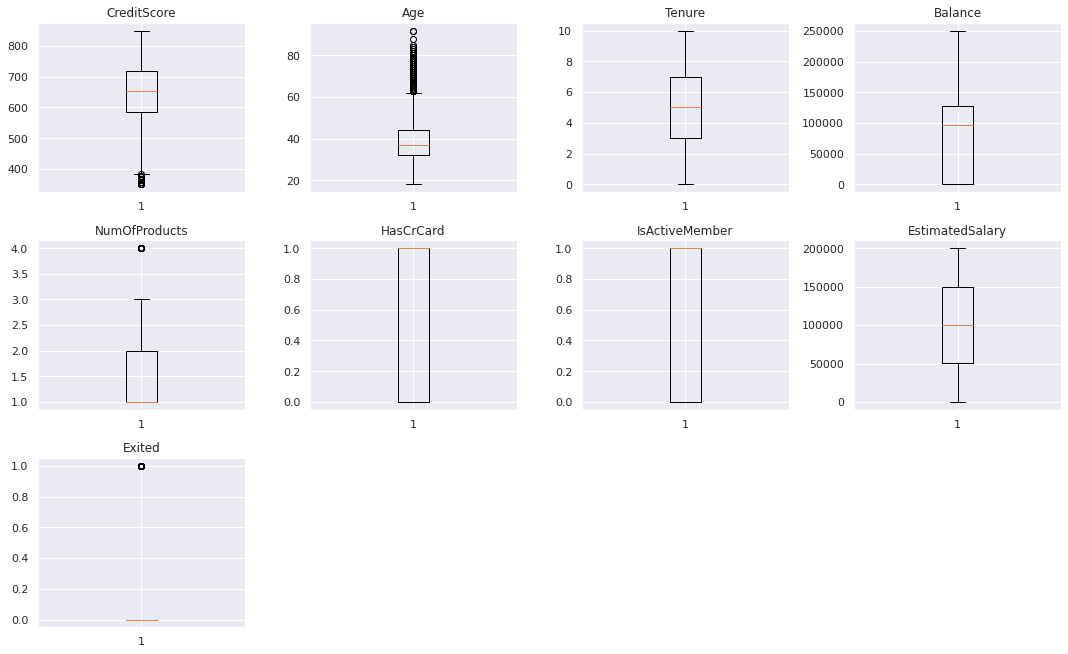

In [272]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [273]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR


In [274]:
## Let us check  Percentage of outliers in  Numerical Columns 
(
    (data.select_dtypes(include=np.number) < lower)
    | (data.select_dtypes(include=np.number) > upper)
).sum() / len(data) * 100

CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

Age and Credit score has outliers .
1. Credit score outliers are very less i.e. 0.15 and  there are roughly 3.5 % outliers in Age .But as we know there are  people from age group  18 to 92 present in this data set with median and mean age around 38 hence we will not treat these outliers as they can be old customers still holding account .
2. Before going for model , we will have to normalize all these nuerical columns as they all have different ranges.

In [275]:
data[numeric_columns]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


We need to Normalize Age , CreditScore ,Tenure, Balance and Number of Products.Before passing them to Model.

In [276]:
X=data.drop(['Exited' ],axis=1)

In [277]:
Y=data['Exited']

In [278]:
X['normalizedAge']=StandardScaler().fit_transform(X['Age'].values .reshape(-1,1))
X=X.drop('Age',axis=1)

In [279]:
X['normalizedBalance']=StandardScaler().fit_transform(X['Balance'].values.reshape(-1,1))
X= X.drop('Balance' ,axis=1)

In [280]:
X['normalizedCreditScore']=StandardScaler().fit_transform(X['CreditScore'].values.reshape(-1,1))
X=X.drop('CreditScore',axis=1)

In [281]:
X['normalizedTenue']=StandardScaler().fit_transform(X['Tenure'].values.reshape(-1,1))
X=X.drop('Tenure',axis=1)

In [282]:
X['normalizedNumOfProducts']=StandardScaler().fit_transform(X['NumOfProducts'].values.reshape(-1,1))
X=X.drop('NumOfProducts',axis=1)

In [283]:
X['normalizedEstimatedSalary']=StandardScaler().fit_transform(X['EstimatedSalary'].values.reshape(-1,1))
X=X.drop('EstimatedSalary',axis=1)

In [284]:
X.head()

,Geography,Gender,HasCrCard,IsActiveMember,normalizedAge,normalizedBalance,normalizedCreditScore,normalizedTenue,normalizedNumOfProducts,normalizedEstimatedSalary
0,France,Female,1,1,0.293517,-1.225848,-0.326221,-1.041760,-0.911583,0.021886
1,Spain,Female,0,1,0.198164,0.117350,-0.440036,-1.387538,-0.911583,0.216534
2,France,Female,1,0,0.293517,1.333053,-1.536794,1.032908,2.527057,0.240687
3,France,Female,0,0,0.007457,-1.225848,0.501521,-1.387538,0.807737,-0.108918
4,Spain,Female,1,1,0.388871,0.785728,2.063884,-1.041760,-0.911583,-0.365276


In [285]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [286]:
y_train.value_counts(normalize=True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

In [287]:
y_test.value_counts(normalize=True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

In [288]:
X_train.isnull().sum()

Geography                    0
Gender                       0
HasCrCard                    0
IsActiveMember               0
normalizedAge                0
normalizedBalance            0
normalizedCreditScore        0
normalizedTenue              0
normalizedNumOfProducts      0
normalizedEstimatedSalary    0
dtype: int64

##Encode Categorical column Gender and Geography

In [289]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Geography= LabelEncoder()

X_train['Geography']=labelencoder_Geography.fit_transform(X_train['Geography'])
X_test['Geography']=labelencoder_Geography.transform(X_test['Geography'])

In [290]:
labelencoder_gender=LabelEncoder()

In [291]:
X_train['Gender']=labelencoder_gender.fit_transform(X_train['Gender'])
X_test['Gender']=labelencoder_gender.transform(X_test['Gender'])

In [292]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  8000 non-null   int64  
 1   Gender                     8000 non-null   int64  
 2   HasCrCard                  8000 non-null   int64  
 3   IsActiveMember             8000 non-null   int64  
 4   normalizedAge              8000 non-null   float64
 5   normalizedBalance          8000 non-null   float64
 6   normalizedCreditScore      8000 non-null   float64
 7   normalizedTenue            8000 non-null   float64
 8   normalizedNumOfProducts    8000 non-null   float64
 9   normalizedEstimatedSalary  8000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 687.5 KB


# Model Building#### 
**A model can make wrong predictions in the following ways:**
* Predicting an Customer  is trying to exit but in reality he/she is not going to exit . 
* Predicting a Customer not going to exit , when he/she is in fact looking forward to exit from bank.

#### **Which case is more important?**
If we do't focus of customers considering that they will not leave  and if they leave then Bank will loose business and we don't even get chance to address their issues and concerns . Hence Predicting Customers who are  really trying to Leave is important.

#### **How to reduce this loss  that is reduce False Negatives?**

Since we want to ensure that we predict Customers leaving Bank correctly .So we should ensure to have high recall rate .

##Model 1 - With 1 hidden layer and SGD Optimizer

Deep neural network
Model-1

We will use a simple NN made of  fully-connected layers with ReLu activation. The NN takes a vector of length 10  as input. This represents the information related to each customer , ie each line with 10 columns from the dataset. For each record, the final layer will output a probability distribution (sigmoid activation function as our output can be either 0 or 1) and classify either either  not exit bank(0) or  will exit (1).


In [293]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [294]:
# Initializing the ANN
model1 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(activation = 'relu', input_dim = 10, units=64))
#Add 1st hidden layer
model1.add(Dense(32, activation='relu'))
# Adding the output layer
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1, activation = 'sigmoid')) 

In [295]:
# Create optimizer with default learning rate
# Compile the model with SGD optimizer and cross entropy as Loss Fucntion
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [296]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [297]:
history1=model1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=2)

Epoch 1/50
200/200 - 2s - loss: 0.5636 - accuracy: 0.7727 - val_loss: 0.5214 - val_accuracy: 0.7906 - 2s/epoch - 9ms/step
Epoch 2/50
200/200 - 1s - loss: 0.4969 - accuracy: 0.7977 - val_loss: 0.4929 - val_accuracy: 0.7906 - 640ms/epoch - 3ms/step
Epoch 3/50
200/200 - 1s - loss: 0.4724 - accuracy: 0.7977 - val_loss: 0.4728 - val_accuracy: 0.7906 - 638ms/epoch - 3ms/step
Epoch 4/50
200/200 - 1s - loss: 0.4551 - accuracy: 0.7977 - val_loss: 0.4566 - val_accuracy: 0.7906 - 649ms/epoch - 3ms/step
Epoch 5/50
200/200 - 1s - loss: 0.4421 - accuracy: 0.7973 - val_loss: 0.4444 - val_accuracy: 0.7925 - 594ms/epoch - 3ms/step
Epoch 6/50
200/200 - 0s - loss: 0.4323 - accuracy: 0.7989 - val_loss: 0.4343 - val_accuracy: 0.7944 - 435ms/epoch - 2ms/step
Epoch 7/50
200/200 - 1s - loss: 0.4247 - accuracy: 0.8008 - val_loss: 0.4265 - val_accuracy: 0.7981 - 522ms/epoch - 3ms/step
Epoch 8/50
200/200 - 0s - loss: 0.4185 - accuracy: 0.8028 - val_loss: 0.4201 - val_accuracy: 0.8050 - 427ms/epoch - 2ms/step
Epo

63/63 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8580


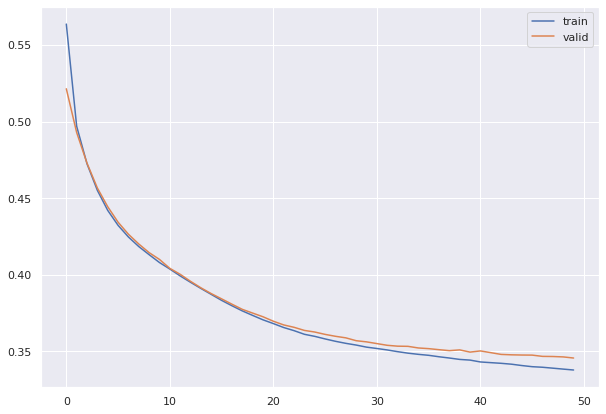

In [298]:
# Capturing learning history per epoch
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)

Finding OutPut by consideriing cut of threshould at 0.5

In [299]:
y_predModel1=model1.predict(X_test)
y_predModel1 = (y_predModel1 > 0.5)
y_predModel1

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [300]:
## This Fucntion will help us in plottiing Confusion matrix and it will provide us 
## count as well as %  values for all TP , TN,FP ,FN
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

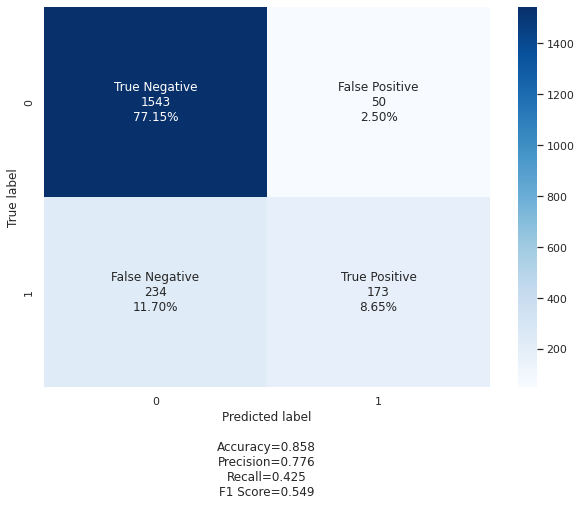

In [301]:
## Plotting COnfusion Matrix for First Model
cm1=confusion_matrix(y_test, y_predModel1)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cm1, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

As you can see, the above model has very low recall score of 0.42 .This could be due to the imbalanced dataset. We observe that the False negative rates are also high 11.70% . For good recall FN should be low .

1) Imbalanced dataset: As you have seen in the EDA, this dataset is imbalanced, and it contains rougly 80% data records  that belong to the 0 class.

2) Decision Threshold: We can use ROC-AUC to find the optimal threshold and use the same for prediction in next model .


#Model2 - Using Adam Optimizer and Adding  additional Hidden layer 


Let's try to change the optimizer  to Adam and  increase the hidden  layers and check how Model performs 

In [302]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [303]:
model2 = Sequential()
      #Adding the hidden and output layers
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 


In [304]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [305]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [306]:
history2=model2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4357 - accuracy: 0.8066 - val_loss: 0.3803 - val_accuracy: 0.8313
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3642 - accuracy: 0.8461 - val_loss: 0.3600 - val_accuracy: 0.8462
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8531 - val_loss: 0.3619 - val_accuracy: 0.8394
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8586 - val_loss: 0.3578 - val_accuracy: 0.8462
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8592 - val_loss: 0.3738 - val_accuracy: 0.8400
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8628 - val_loss: 0.3660 - val_accuracy: 0.8469
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8661 - val_loss: 0.3615 - val_accuracy: 0.8394
Epoch 

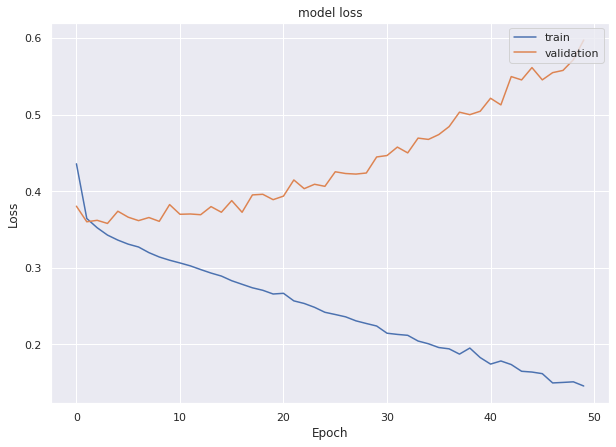

In [307]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Let us find best threshold using roc_curve and use it is predicting for given model rather than taking some random number.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.082133, G-Mean=0.742


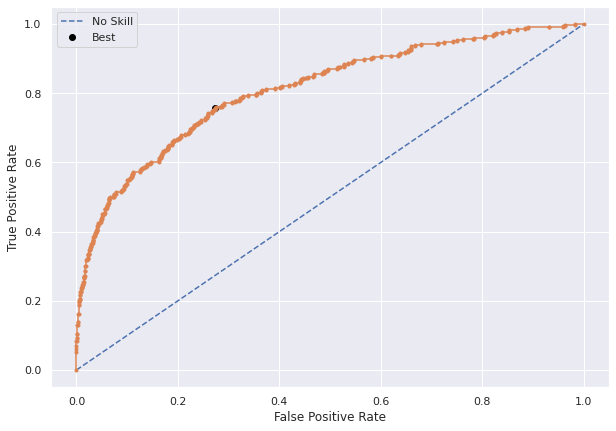

In [308]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhat1 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [309]:
#Predicting the results using best as a threshold
y_pred_model2=model2.predict(X_test)
y_pred_model2 = (y_pred_model2 > thresholds1[ix])
y_pred_model2

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

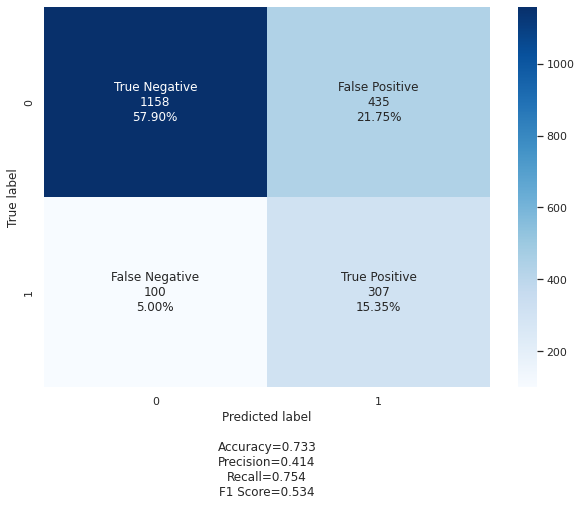

In [310]:
cm2=confusion_matrix(y_test, y_pred_model2)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cm2, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

# Observation
Looikng at Model we can see that there is lot if noise  and after certain threashold Validation Loss is increaing . This is is due to model is overfitting training data . Also Recall score is 07.75 which is better than previos model but still we can do better by adding Drop outs which is technique to address overfitting .

# Model3 - Using Drop Out 

# Dropout 

Dropout is a regularization technique for neural network models. A Simple Way to Prevent Neural Networks from Overfitting. 
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

In [311]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [312]:
model3 = Sequential()
      #Adding the hidden and output layers
model3.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 


In [313]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [314]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-traina

In [315]:
history3 = model3.fit(X_train,y_train,batch_size=64,epochs=70,verbose=1,validation_split = 0.2)

Epoch 1/70
100/100 [==============================] - 3s 12ms/step - loss: 0.4431 - accuracy: 0.8067 - val_loss: 0.3898 - val_accuracy: 0.8238
Epoch 2/70
100/100 [==============================] - 1s 7ms/step - loss: 0.3789 - accuracy: 0.8345 - val_loss: 0.3632 - val_accuracy: 0.8487
Epoch 3/70
100/100 [==============================] - 1s 8ms/step - loss: 0.3696 - accuracy: 0.8414 - val_loss: 0.3587 - val_accuracy: 0.8481
Epoch 4/70
100/100 [==============================] - 1s 8ms/step - loss: 0.3568 - accuracy: 0.8505 - val_loss: 0.3539 - val_accuracy: 0.8450
Epoch 5/70
100/100 [==============================] - 1s 5ms/step - loss: 0.3512 - accuracy: 0.8544 - val_loss: 0.3647 - val_accuracy: 0.8481
Epoch 6/70
100/100 [==============================] - 1s 5ms/step - loss: 0.3490 - accuracy: 0.8559 - val_loss: 0.3565 - val_accuracy: 0.8562
Epoch 7/70
100/100 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8527 - val_loss: 0.3498 - val_accuracy: 0.8494
Epoch

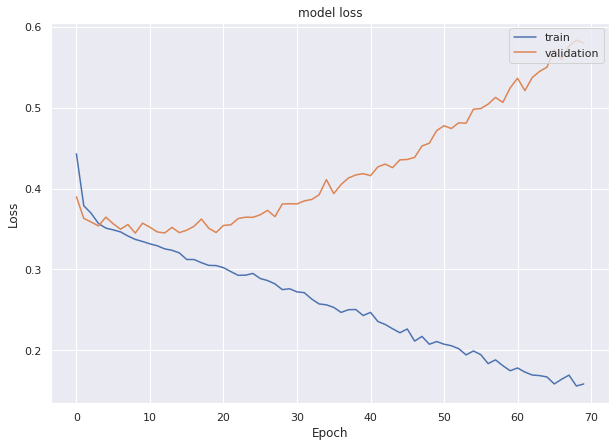

In [316]:
#Plotting Train Loss vs Validation Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.098321, G-Mean=0.725


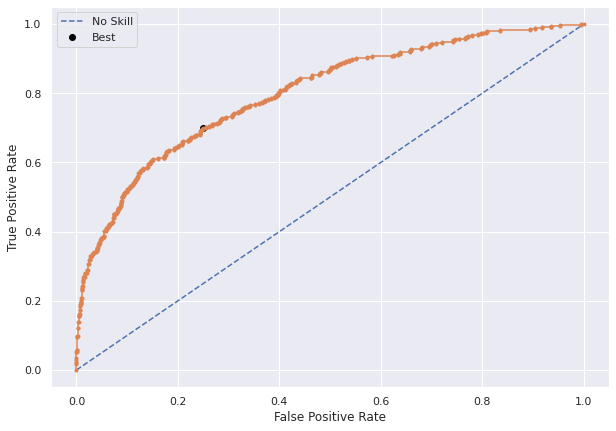

In [317]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhat1 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [318]:
#Predicting the results using best as a threshold
y_pred_model3=model3.predict(X_test)
y_pred_model3 = (y_pred_model3 > thresholds1[ix])
y_pred_model3

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

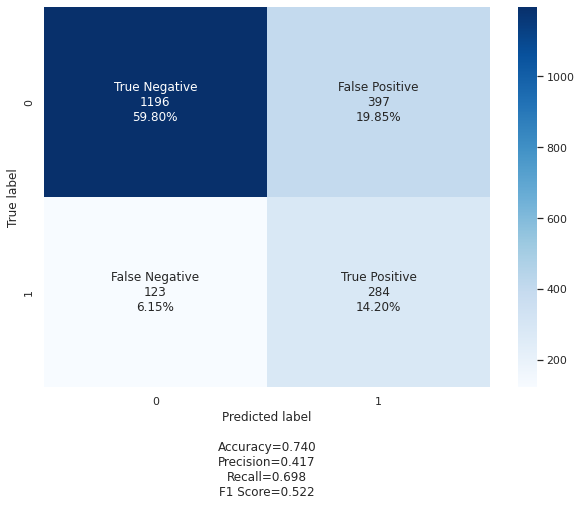

In [319]:
cm3=confusion_matrix(y_test, y_pred_model3)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cm3, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

#Observation
After adding Drop outs  we don't see much improment and still there is lot of noise and Also the recall has gone down to 0.69 .
Let us try adding drop out after 2 and 3 layer and we will also use Batch Normailization with RMSProp Optimizer .

#Model4 - With  Drop out and batch Normalization after layer 2 and layer 3 with RMSProp  Optimizer 

In [320]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [321]:
model4 = Sequential()
      #Adding the hidden and output layers
model4.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model4.add(Dropout(0.2))
model4.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model4.add(BatchNormalization())
model4.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with RMSProp  and binary cross entropy loss function 


In [322]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [323]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [324]:
history4 = model4.fit(X_train,y_train,batch_size=128,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
50/50 [==============================] - 2s 18ms/step - loss: 0.6359 - accuracy: 0.6542 - val_loss: 0.5765 - val_accuracy: 0.7206
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.4976 - accuracy: 0.7802 - val_loss: 0.4339 - val_accuracy: 0.8213
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.4209 - accuracy: 0.8252 - val_loss: 0.3766 - val_accuracy: 0.8431
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3889 - accuracy: 0.8377 - val_loss: 0.3602 - val_accuracy: 0.8531
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3737 - accuracy: 0.8436 - val_loss: 0.3652 - val_accuracy: 0.8512
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.3639 - accuracy: 0.8464 - val_loss: 0.3574 - val_accuracy: 0.8481
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3583 - accuracy: 0.8506 - val_loss: 0.3404 - val_accuracy: 0.8606
Epoch 8/50
50/5

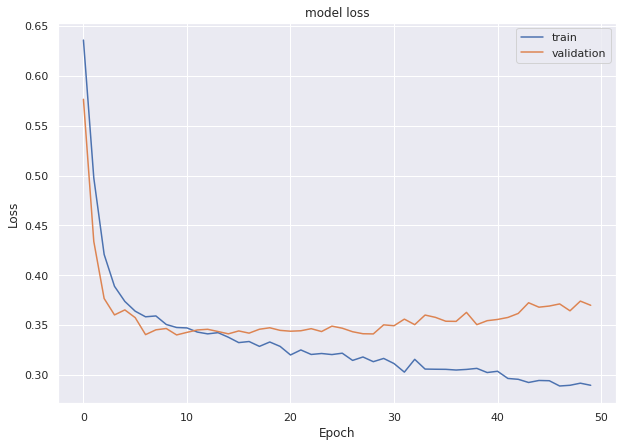

In [325]:
#Plotting Train Loss vs Validation Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.135691, G-Mean=0.761


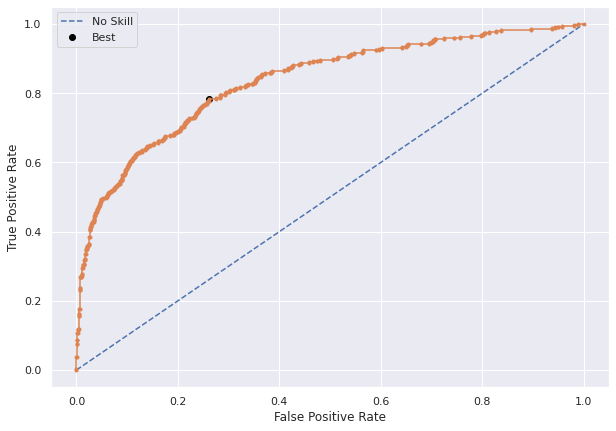

In [326]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhat1 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [327]:
#Predicting the results using best as a threshold
y_pred_model4=model4.predict(X_test)
y_pred_model4 = (y_pred_model4 > thresholds1[ix])
y_pred_model4

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

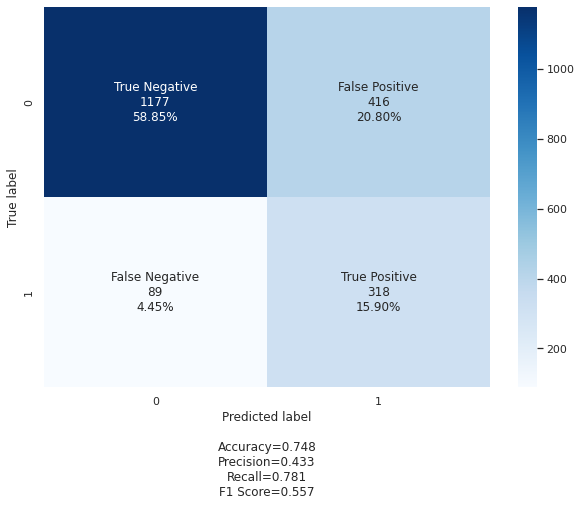

In [328]:
cm4=confusion_matrix(y_test, y_pred_model4)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cm4, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

# Observation
We definately can see somewhat reduction is noise and drop out with batch Normalizetion is helping . Eventhough Training and validation Losses are somewhat parallel and recall has improved to 0.78 .
We can use the same Model with Early stopping and weight initialization as we know target class is higly imbalanced .

# Model5 with  Early Stopping and Weight Initialization
Early stopping:

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

Weight Initialization

Weight initialization is an important consideration in the design of a neural network model.

The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.


In [329]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [330]:
##########
es= keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=20,
                                  verbose=0 ,mode='min',restore_best_weights= True)
                                  
Model5 = Sequential()
      #Adding the hidden and output layers
Model5.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
Model5.add(Dropout(0.2))
Model5.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
Model5.add(BatchNormalization())
Model5.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
Model5.add(Dropout(0.2))
Model5.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
Model5.add(BatchNormalization())
Model5.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with RMSProp  and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
Model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod5= Model5.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1 )

Epoch 1/40
10/10 [==============================] - 3s 53ms/step - loss: 0.7640 - accuracy: 0.5550 - val_loss: 0.6881 - val_accuracy: 0.5763
Epoch 2/40
10/10 [==============================] - 0s 20ms/step - loss: 0.6555 - accuracy: 0.6439 - val_loss: 0.6723 - val_accuracy: 0.6062
Epoch 3/40
10/10 [==============================] - 0s 20ms/step - loss: 0.6039 - accuracy: 0.6762 - val_loss: 0.6669 - val_accuracy: 0.6181
Epoch 4/40
10/10 [==============================] - 0s 19ms/step - loss: 0.5654 - accuracy: 0.7186 - val_loss: 0.6496 - val_accuracy: 0.6494
Epoch 5/40
10/10 [==============================] - 0s 20ms/step - loss: 0.5346 - accuracy: 0.7558 - val_loss: 0.6102 - val_accuracy: 0.6931
Epoch 6/40
10/10 [==============================] - 0s 20ms/step - loss: 0.5060 - accuracy: 0.7837 - val_loss: 0.5691 - val_accuracy: 0.7475
Epoch 7/40
10/10 [==============================] - 0s 20ms/step - loss: 0.4870 - accuracy: 0.7980 - val_loss: 0.5230 - val_accuracy: 0.7825
Epoch 8/40
10

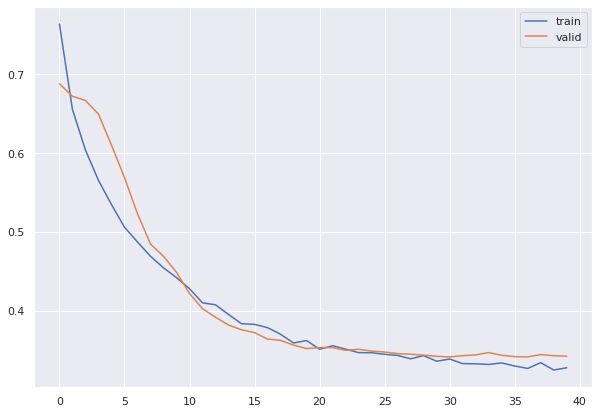

In [331]:
# Capturing learning history per epoch
hist5  = pd.DataFrame(his_mod5.history)
hist5['epoch'] = his_mod5.epoch

# Plotting accuracy at different epochs
plt.plot(hist5['loss'])
plt.plot(hist5['val_loss'])
plt.legend(("train" , "valid") , loc =0)

63/63 [==============================] - 0s 3ms/step
Best Threshold=0.207324, G-Mean=0.769


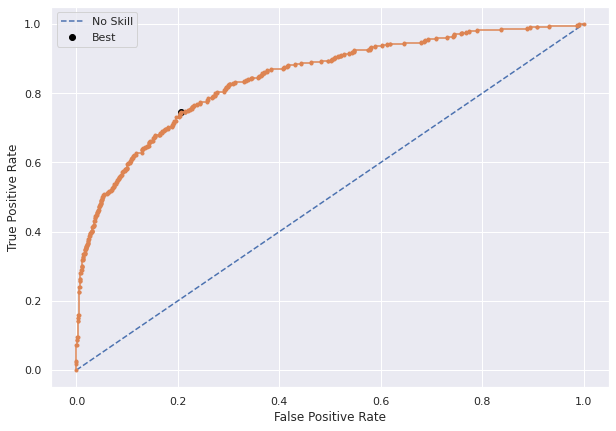

In [332]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhat1 = Model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [333]:
#Predicting the results using best as a threshold
y_pred_model5=Model5.predict(X_test)
y_pred_model5 = (y_pred_model5 > thresholds1[ix])
y_pred_model5

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

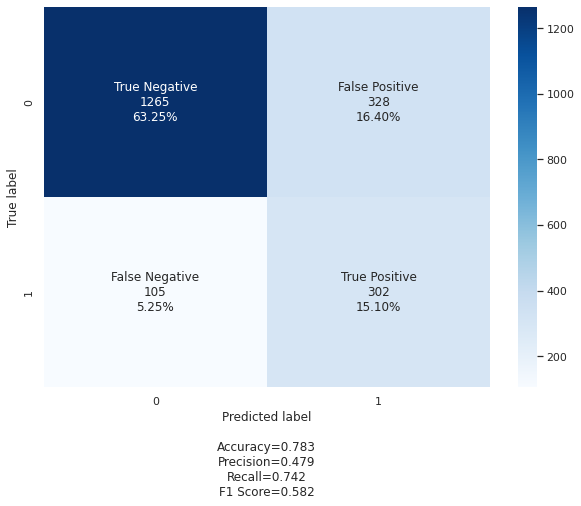

In [334]:
cm5=confusion_matrix(y_test, y_pred_model5)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cm5, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

#Observation
We can clearly see that  Training and Validation Loss are  very near and much less noise as compared to previous models . Also There is slight increase in Recall . Let us keep the model same but we will add class weights see if there is improvement in  recall .

# Applying Weighted loss to account for imbalance in Target field (Exit) in training  data set
we will adjust the class imbalance by giving additional weight to the loss associated to errors made on  prediting wrong customer being existed.
We will use our final fifth ANN model and apply weighted loss on it .

In [335]:
y_train.head()

4256    0
9151    0
696     1
4898    0
6427    0
Name: Exited, dtype: int64

In [336]:
from sklearn.utils import class_weight

#class_weights = class_weight.compute_class_weight(np.unique(y_train),np.array([y_train.iloc[i] for i in range(len(y_train))]),"balanced")
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [337]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
histModFinal=Model5.fit(X_train,y_train,batch_size=15,epochs=40, class_weight=class_weights, shuffle=True ,verbose=1)    

Epoch 1/40
534/534 [==============================] - 3s 3ms/step - loss: 0.5537 - accuracy: 0.7494
Epoch 2/40
534/534 [==============================] - 2s 3ms/step - loss: 0.5100 - accuracy: 0.7487
Epoch 3/40
534/534 [==============================] - 2s 4ms/step - loss: 0.5010 - accuracy: 0.7628
Epoch 4/40
534/534 [==============================] - 2s 4ms/step - loss: 0.4945 - accuracy: 0.7645
Epoch 5/40
534/534 [==============================] - 3s 5ms/step - loss: 0.4923 - accuracy: 0.7666
Epoch 6/40
534/534 [==============================] - 2s 5ms/step - loss: 0.4820 - accuracy: 0.7675
Epoch 7/40
534/534 [==============================] - 2s 3ms/step - loss: 0.4799 - accuracy: 0.7750
Epoch 8/40
534/534 [==============================] - 2s 3ms/step - loss: 0.4808 - accuracy: 0.7717
Epoch 9/40
534/534 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.7793
Epoch 10/40
534/534 [==============================] - 2s 3ms/step - loss: 0.4783 - accuracy: 0.7784

In [344]:
score_weighted = Model5.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7610


63/63 [==============================] - 0s 2ms/step
Best Threshold=0.523010, G-Mean=0.771


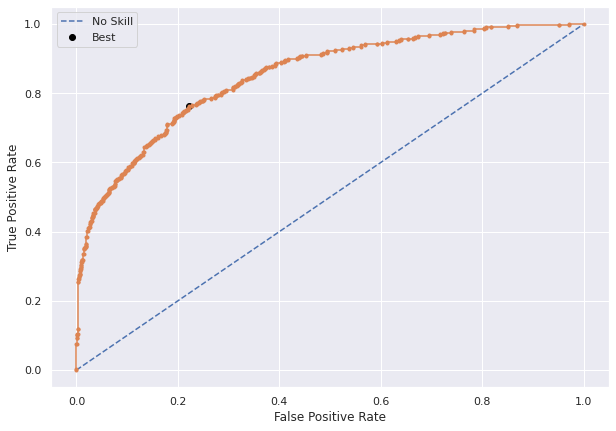

In [342]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhatFinal = Model5.predict(X_test)
# keep probabilities for the positive outcome only
yhatFinal = yhatFinal[:, 0]
# calculate roc curves
fpr, tpr, thresholdsFinal = roc_curve(y_test, yhatFinal)
# calculate the g-mean for each threshold
gmeansFinal = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeansFinal)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholdsFinal[ix], gmeansFinal[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

63/63 [==============================] - 0s 2ms/step


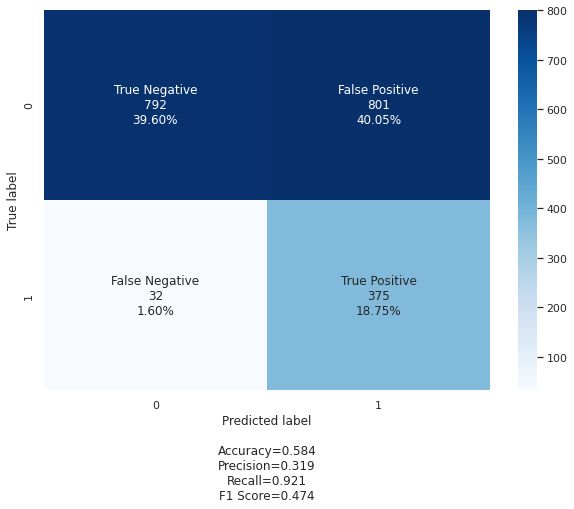

In [343]:
## Confusion Matrix on unsee test set
#Predicting the results using best as a threshold
y_pred_modelFinal=Model5.predict(X_test)
y_pred_modelFinal = (y_pred_modelFinal > thresholds1[ix])
y_pred_modelFinal

cmfinal=confusion_matrix(y_test, y_pred_modelFinal)
labels = ['True Negative','False Positive','False Negative','True Positive']

make_confusion_matrix(cmfinal, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

# Observation 
We can clearly see Recall has improved a lot and reach 90% Also .Looking at data False Negative ( Customers who are going to exit but model predicting that they will not exit ) has come to to 32  i.e 1.60 % as compared to out first model where  Faluse negative values was  234 that is 11.70% of the  data set .

#Conclusion   

*   We build various model  by starting with simple model and and then gradually  build new modesl by adding addition hidder layers , addressing overfitting by add drop out layers and Normalization technique .
*  As we know train data  is imbalanced data with 80% data belonging to customers will not exit and only 20% data for customer who  will exit . This make any model give bias predictions hence we used class weights .
*   Though with these changes we can see recall rate of model has improved a lot  92 % but still it has low  precision rate so Bank will spend more time in targeting wrong customers  who are not inclined for exiting .
*  In future iterations we can further apply SMOTE to over and unsample data  and also see if any additional hyper parameters can help in having considertable precion rate as well .

#Business Recommandations 
*   Need of the hour is to target the Customers who are going to leave and stop them  from leaving the Bank and Model5 does this job best by giving high recall rate of 92% with imbalanced data .
*  Bank should use this model and target the customer who are probbly going to exit and Provider them  better services and address their issues in timely manner so that Bank can retain them and save the business .
*  Also while contacting these customers , Bank might come to know there issues and pain points and with that data bank can not only work on  retaining thesee customer but can also use that information in new customer compain .






